In [1]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

## House

In [8]:
def_filtered = pl.read_csv("UK_house_price_filtered.csv")

In [9]:
def_filtered

Transaction_ID,House_Price,Postcode,latitude,longitude,Property_type,Old_New,Town_city,District,County,year_trans,Region
str,i64,str,f64,f64,str,str,str,str,str,i64,str
"""{D8127CD0-5A78-4413-8F5A-CD7E2…",35000,"""LA3 1PT""",54.035583,-2.87485,"""S""","""N""","""MORECAMBE""","""LANCASTER""","""LANCASHIRE""",1995,"""North West"""
"""{8524B47D-47ED-4C6B-97BF-D1145…",56950,"""ST5 7UE""",53.00718,-2.253533,"""D""","""Y""","""NEWCASTLE""","""NEWCASTLE-UNDER-LYME""","""STAFFORDSHIRE""",1995,"""West Midlands"""
"""{92A77299-BCFF-433B-B54D-D1148…",56952,"""SE16 3EY""",51.49742,-0.0528,"""F""","""Y""","""LONDON""","""SOUTHWARK""","""GREATER LONDON""",1995,"""London"""
"""{AECA5453-F149-46BF-B3E3-CA05B…",74000,"""DY8 5PW""",52.462167,-2.15605,"""D""","""N""","""STOURBRIDGE""","""DUDLEY""","""WEST MIDLANDS""",1995,"""West Midlands"""
"""{6785BDEE-16CA-4D80-8131-CA05D…",155000,"""OX39 4AF""",51.7018,-0.9116,"""D""","""Y""","""CHINNOR""","""SOUTH OXFORDSHIRE""","""OXFORDSHIRE""",1995,"""South East"""
…,…,…,…,…,…,…,…,…,…,…,…
"""{12A8BAB6-A700-2125-E063-4804A…",225000,"""S8 0UT""",53.3439,-1.47815,"""T""","""N""","""SHEFFIELD""","""SHEFFIELD""","""SOUTH YORKSHIRE""",2024,"""Yorkshire and the Humber"""
"""{12A8BAB6-A701-2125-E063-4804A…",156500,"""S20 1BA""",53.3347,-1.352,"""T""","""N""","""SHEFFIELD""","""SHEFFIELD""","""SOUTH YORKSHIRE""",2024,"""Yorkshire and the Humber"""
"""{12A8BAB6-A708-2125-E063-4804A…",170000,"""S20 2QT""",53.3347,-1.352,"""D""","""N""","""SHEFFIELD""","""SHEFFIELD""","""SOUTH YORKSHIRE""",2024,"""Yorkshire and the Humber"""


In [3]:
grouped_df = def_filtered.group_by(['year_trans', 'Region']).agg(pl.col("House_Price").mean().alias("avg_price")) 

In [4]:
grouped_df

year_trans,Region,avg_price
i64,str,f64
2018,"""Wales""",183279.2232
2019,"""Yorkshire and the Humber""",197547.142198
2017,"""North East""",160426.489162
2000,"""North West""",69877.266904
2018,"""London""",621549.132498
…,…,…
2007,"""East of England""",227610.416651
2013,"""West Midlands""",177995.178536
2023,"""North East""",188474.519141


In [5]:
def_filtered

Transaction_ID,House_Price,Postcode,latitude,longitude,Property_type,Old_New,Town_city,District,County,year_trans,Region
str,i64,str,f64,f64,str,str,str,str,str,i64,str
"""{D8127CD0-5A78-4413-8F5A-CD7E2…",35000,"""LA3 1PT""",54.035583,-2.87485,"""S""","""N""","""MORECAMBE""","""LANCASTER""","""LANCASHIRE""",1995,"""North West"""
"""{8524B47D-47ED-4C6B-97BF-D1145…",56950,"""ST5 7UE""",53.00718,-2.253533,"""D""","""Y""","""NEWCASTLE""","""NEWCASTLE-UNDER-LYME""","""STAFFORDSHIRE""",1995,"""West Midlands"""
"""{92A77299-BCFF-433B-B54D-D1148…",56952,"""SE16 3EY""",51.49742,-0.0528,"""F""","""Y""","""LONDON""","""SOUTHWARK""","""GREATER LONDON""",1995,"""London"""
"""{AECA5453-F149-46BF-B3E3-CA05B…",74000,"""DY8 5PW""",52.462167,-2.15605,"""D""","""N""","""STOURBRIDGE""","""DUDLEY""","""WEST MIDLANDS""",1995,"""West Midlands"""
"""{6785BDEE-16CA-4D80-8131-CA05D…",155000,"""OX39 4AF""",51.7018,-0.9116,"""D""","""Y""","""CHINNOR""","""SOUTH OXFORDSHIRE""","""OXFORDSHIRE""",1995,"""South East"""
…,…,…,…,…,…,…,…,…,…,…,…
"""{12A8BAB6-A700-2125-E063-4804A…",225000,"""S8 0UT""",53.3439,-1.47815,"""T""","""N""","""SHEFFIELD""","""SHEFFIELD""","""SOUTH YORKSHIRE""",2024,"""Yorkshire and the Humber"""
"""{12A8BAB6-A701-2125-E063-4804A…",156500,"""S20 1BA""",53.3347,-1.352,"""T""","""N""","""SHEFFIELD""","""SHEFFIELD""","""SOUTH YORKSHIRE""",2024,"""Yorkshire and the Humber"""
"""{12A8BAB6-A708-2125-E063-4804A…",170000,"""S20 2QT""",53.3347,-1.352,"""D""","""N""","""SHEFFIELD""","""SHEFFIELD""","""SOUTH YORKSHIRE""",2024,"""Yorkshire and the Humber"""


In [ ]:
house_df = pd.read_csv("C:/Users/nph1u24/OneDrive - University of Southampton/MSc Bussiness Analytics and Finance/Project/Data/UK House price/houses_with_rf_prob.csv")

In [11]:
house_df = house_df.dropna()

In [12]:
house_df

,Unnamed: 0.1,Unnamed: 0,Transaction_ID,House_Price,Postcode,latitude,longitude,Property_type,Old_New,Town_city,...,transactionid,duration,tfarea,numberrooms,geometry,nearest_station,nearest_university_dist,nearest_green,log_prob,rf_prob
0,0,0,{92A77299-BCFF-433B-B54D-D114861197D7},56952,SE16 3EY,51.497420,-0.052800,F,Y,LONDON,...,{92A77299-BCFF-433B-B54D-D114861197D7},L,47.000,3.0,POINT (535261.0775614851 179405.93911222665),224.798992,2797.112099,38.810821,0.974007,0.860
1,1,1,{AECA5453-F149-46BF-B3E3-CA05B7E47CE5},74000,DY8 5PW,52.462167,-2.156050,D,N,STOURBRIDGE,...,{AECA5453-F149-46BF-B3E3-CA05B7E47CE5},F,55.870,4.0,POINT (389494.07044475956 284923.41199405486),1212.818165,1768.947341,79.270210,0.494991,0.314
2,2,2,{6785BDEE-16CA-4D80-8131-CA05D4F4DBE0},155000,OX39 4AF,51.701800,-0.911600,D,Y,CHINNOR,...,{6785BDEE-16CA-4D80-8131-CA05D4F4DBE0},F,194.000,7.0,POINT (475311.04167192505 200899.65623530664),5010.363458,13786.956340,0.000000,0.041066,0.014
3,3,3,{49A6A979-61D4-4F09-89C8-D4946C42987E},12500,OL13 0EA,53.701450,-2.203625,T,N,BACUP,...,{49A6A979-61D4-4F09-89C8-D4946C42987E},L,75.000,4.0,POINT (386654.24816103635 422797.15877863095),6572.206923,10556.040801,51.876343,0.000003,0.000
4,4,4,{53796AB0-AA5F-4477-B7E5-CD7E7A62949C},115000,W14 0QD,51.495500,-0.217980,F,N,LONDON,...,{53796AB0-AA5F-4477-B7E5-CD7E7A62949C},L,86.128,4.0,POINT (523801.24392444815 178900.37923380872),593.738818,489.217304,0.000000,0.743091,0.546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20938682,20938682,20938682,{12A8BAB6-A700-2125-E063-4804A8C08CC1},225000,S8 0UT,53.343900,-1.478150,T,N,SHEFFIELD,...,{12A8BAB6-A700-2125-E063-4804A8C08CC1},L,70.000,5.0,POINT (434840.86869859265 383125.16248035734),3063.842409,4019.281952,134.837741,0.179890,0.356
20938683,20938683,20938683,{12A8BAB6-A701-2125-E063-4804A8C08CC1},156500,S20 1BA,53.334700,-1.352000,T,N,SHEFFIELD,...,{12A8BAB6-A701-2125-E063-4804A8C08CC1},F,77.000,4.0,POINT (443248.90190895816 382170.3424007739),3254.182334,9018.180663,165.445818,0.021816,0.004
20938684,20938684,20938684,{12A8BAB6-A708-2125-E063-4804A8C08CC1},170000,S20 2QT,53.334700,-1.352000,D,N,SHEFFIELD,...,{12A8BAB6-A708-2125-E063-4804A8C08CC1},F,57.000,4.0,POINT (443248.90190895816 382170.3424007739),3254.182334,9018.180663,165.445818,0.021816,0.004
20938685,20938685,20938685,{12A8BAB6-A709-2125-E063-4804A8C08CC1},210000,S71 2JF,53.576500,-1.441567,S,N,BARNSLEY,...,{12A8BAB6-A709-2125-E063-4804A8C08CC1},F,69.000,4.0,POINT (437074.2349063414 409020.92356781836),3413.270645,3864.725298,665.320846,0.313684,0.096


In [20]:
cols_to_winsor = ["House_Price", "tfarea", "numberrooms"]

for col in cols_to_winsor:
    house_df[col + "_w"] = winsorize(house_df[col], limits=[0.01, 0.01])  # 1% tails

C:\Users\nph1u24\AppData\Local\Temp\ipykernel_24476\1331146069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df[col + "_w"] = winsorize(house_df[col], limits=[0.01, 0.01])  # 1% tails


In [15]:
house_df

,Unnamed: 0.1,Unnamed: 0,Transaction_ID,House_Price,Postcode,latitude,longitude,Property_type,Old_New,Town_city,...,numberrooms,geometry,nearest_station,nearest_university_dist,nearest_green,log_prob,rf_prob,House_Price_w,tfarea_w,numberrooms_w
0,0,0,{92A77299-BCFF-433B-B54D-D114861197D7},56952,SE16 3EY,51.497420,-0.052800,F,Y,LONDON,...,3.0,POINT (535261.0775614851 179405.93911222665),224.798992,2797.112099,38.810821,0.974007,0.860,56952,47.000,3.0
1,1,1,{AECA5453-F149-46BF-B3E3-CA05B7E47CE5},74000,DY8 5PW,52.462167,-2.156050,D,N,STOURBRIDGE,...,4.0,POINT (389494.07044475956 284923.41199405486),1212.818165,1768.947341,79.270210,0.494991,0.314,74000,55.870,4.0
2,2,2,{6785BDEE-16CA-4D80-8131-CA05D4F4DBE0},155000,OX39 4AF,51.701800,-0.911600,D,Y,CHINNOR,...,7.0,POINT (475311.04167192505 200899.65623530664),5010.363458,13786.956340,0.000000,0.041066,0.014,155000,194.000,7.0
3,3,3,{49A6A979-61D4-4F09-89C8-D4946C42987E},12500,OL13 0EA,53.701450,-2.203625,T,N,BACUP,...,4.0,POINT (386654.24816103635 422797.15877863095),6572.206923,10556.040801,51.876343,0.000003,0.000,12500,75.000,4.0
4,4,4,{53796AB0-AA5F-4477-B7E5-CD7E7A62949C},115000,W14 0QD,51.495500,-0.217980,F,N,LONDON,...,4.0,POINT (523801.24392444815 178900.37923380872),593.738818,489.217304,0.000000,0.743091,0.546,115000,86.128,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20938682,20938682,20938682,{12A8BAB6-A700-2125-E063-4804A8C08CC1},225000,S8 0UT,53.343900,-1.478150,T,N,SHEFFIELD,...,5.0,POINT (434840.86869859265 383125.16248035734),3063.842409,4019.281952,134.837741,0.179890,0.356,225000,70.000,5.0
20938683,20938683,20938683,{12A8BAB6-A701-2125-E063-4804A8C08CC1},156500,S20 1BA,53.334700,-1.352000,T,N,SHEFFIELD,...,4.0,POINT (443248.90190895816 382170.3424007739),3254.182334,9018.180663,165.445818,0.021816,0.004,156500,77.000,4.0
20938684,20938684,20938684,{12A8BAB6-A708-2125-E063-4804A8C08CC1},170000,S20 2QT,53.334700,-1.352000,D,N,SHEFFIELD,...,4.0,POINT (443248.90190895816 382170.3424007739),3254.182334,9018.180663,165.445818,0.021816,0.004,170000,57.000,4.0
20938685,20938685,20938685,{12A8BAB6-A709-2125-E063-4804A8C08CC1},210000,S71 2JF,53.576500,-1.441567,S,N,BARNSLEY,...,4.0,POINT (437074.2349063414 409020.92356781836),3413.270645,3864.725298,665.320846,0.313684,0.096,210000,69.000,4.0


In [16]:
house_df.columns.tolist()

['Unnamed: 0.1',
 'Unnamed: 0',
 'Transaction_ID',
 'House_Price',
 'Postcode',
 'latitude',
 'longitude',
 'Property_type',
 'Old_New',
 'Town_city',
 'District',
 'County',
 'year_trans',
 'Region',
 'transactionid',
 'duration',
 'tfarea',
 'numberrooms',
 'geometry',
 'nearest_station',
 'nearest_university_dist',
 'nearest_green',
 'log_prob',
 'rf_prob',
 'House_Price_w',
 'tfarea_w',
 'numberrooms_w']

In [40]:
columns_to_drop = ['Unnamed: 0.1',
    'Unnamed: 0',
    
    'House_Price',
    'Town_city',
    'District',
    'tfarea',
    'numberrooms',
    'transactionid',
    'geometry',
]

In [41]:
house_df_final = house_df.drop(columns=columns_to_drop)

In [49]:
house_df_final.to_csv("houses_with_rf_prob_cleaned.csv", index=False)

In [42]:
house_df_final['rf_flood'] = np.where(house_df_final['rf_prob'] >= 0.533, 1, 0)

In [ ]:

house_df_final['log_flood'] = np.where(house_df_final['log_prob'] >= 0.5243851, 1, 0)

In [44]:
house_df_final

,Transaction_ID,Postcode,latitude,longitude,Property_type,Old_New,County,year_trans,Region,duration,nearest_station,nearest_university_dist,nearest_green,log_prob,rf_prob,House_Price_w,tfarea_w,numberrooms_w,rf_flood,log_flood
0,{92A77299-BCFF-433B-B54D-D114861197D7},SE16 3EY,51.497420,-0.052800,F,Y,GREATER LONDON,1995,London,L,224.798992,2797.112099,38.810821,0.974007,0.860,56952,47.000,3.0,1,1
1,{AECA5453-F149-46BF-B3E3-CA05B7E47CE5},DY8 5PW,52.462167,-2.156050,D,N,WEST MIDLANDS,1995,West Midlands,F,1212.818165,1768.947341,79.270210,0.494991,0.314,74000,55.870,4.0,0,0
2,{6785BDEE-16CA-4D80-8131-CA05D4F4DBE0},OX39 4AF,51.701800,-0.911600,D,Y,OXFORDSHIRE,1995,South East,F,5010.363458,13786.956340,0.000000,0.041066,0.014,155000,194.000,7.0,0,0
3,{49A6A979-61D4-4F09-89C8-D4946C42987E},OL13 0EA,53.701450,-2.203625,T,N,LANCASHIRE,1995,North West,L,6572.206923,10556.040801,51.876343,0.000003,0.000,21000,75.000,4.0,0,0
4,{53796AB0-AA5F-4477-B7E5-CD7E7A62949C},W14 0QD,51.495500,-0.217980,F,N,GREATER LONDON,1995,London,L,593.738818,489.217304,0.000000,0.743091,0.546,115000,86.128,4.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20938682,{12A8BAB6-A700-2125-E063-4804A8C08CC1},S8 0UT,53.343900,-1.478150,T,N,SOUTH YORKSHIRE,2024,Yorkshire and the Humber,L,3063.842409,4019.281952,134.837741,0.179890,0.356,225000,70.000,5.0,0,0
20938683,{12A8BAB6-A701-2125-E063-4804A8C08CC1},S20 1BA,53.334700,-1.352000,T,N,SOUTH YORKSHIRE,2024,Yorkshire and the Humber,F,3254.182334,9018.180663,165.445818,0.021816,0.004,156500,77.000,4.0,0,0
20938684,{12A8BAB6-A708-2125-E063-4804A8C08CC1},S20 2QT,53.334700,-1.352000,D,N,SOUTH YORKSHIRE,2024,Yorkshire and the Humber,F,3254.182334,9018.180663,165.445818,0.021816,0.004,170000,57.000,4.0,0,0
20938685,{12A8BAB6-A709-2125-E063-4804A8C08CC1},S71 2JF,53.576500,-1.441567,S,N,SOUTH YORKSHIRE,2024,Yorkshire and the Humber,F,3413.270645,3864.725298,665.320846,0.313684,0.096,210000,69.000,4.0,0,0


In [38]:
# Path to the folder with CSVs
import os
folder_path = "C:/Users/nph1u24/OneDrive - University of Southampton/MSc Bussiness Analytics and Finance/Project/Data/UK House price/hpm_la_2024/hpm_la_2024"

# Get all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

# Read and merge them
df_list = [pd.read_csv(os.path.join(folder_path, f)) for f in csv_files]
merged_df = pd.concat(df_list, ignore_index=True)

# Save merged file (optional)
merged_df.to_csv("merged_price_lse.csv", index=False)

In [8]:
merged_df = pd.read_csv("C:/Users/nph1u24/OneDrive - University of Southampton/MSc Bussiness Analytics and Finance/Project/Data/UK House price/merged_price_lse.csv")

In [47]:
house_df_final.merge(merged_df[['transactionid','dateoftransfer']], left_on='Transaction_ID', right_on='transactionid', how='left')

,Transaction_ID,Postcode,latitude,longitude,Property_type,Old_New,County,year_trans,Region,duration,...,nearest_green,log_prob,rf_prob,House_Price_w,tfarea_w,numberrooms_w,rf_flood,log_flood,transactionid,dateoftransfer
0,{92A77299-BCFF-433B-B54D-D114861197D7},SE16 3EY,51.497420,-0.052800,F,Y,GREATER LONDON,1995,London,L,...,38.810821,0.974007,0.860,56952,47.000,3.0,1,1,{92A77299-BCFF-433B-B54D-D114861197D7},1995-03-31
1,{AECA5453-F149-46BF-B3E3-CA05B7E47CE5},DY8 5PW,52.462167,-2.156050,D,N,WEST MIDLANDS,1995,West Midlands,F,...,79.270210,0.494991,0.314,74000,55.870,4.0,0,0,{AECA5453-F149-46BF-B3E3-CA05B7E47CE5},1995-12-01
2,{6785BDEE-16CA-4D80-8131-CA05D4F4DBE0},OX39 4AF,51.701800,-0.911600,D,Y,OXFORDSHIRE,1995,South East,F,...,0.000000,0.041066,0.014,155000,194.000,7.0,0,0,{6785BDEE-16CA-4D80-8131-CA05D4F4DBE0},1995-08-09
3,{49A6A979-61D4-4F09-89C8-D4946C42987E},OL13 0EA,53.701450,-2.203625,T,N,LANCASHIRE,1995,North West,L,...,51.876343,0.000003,0.000,21000,75.000,4.0,0,0,{49A6A979-61D4-4F09-89C8-D4946C42987E},1995-08-25
4,{53796AB0-AA5F-4477-B7E5-CD7E7A62949C},W14 0QD,51.495500,-0.217980,F,N,GREATER LONDON,1995,London,L,...,0.000000,0.743091,0.546,115000,86.128,4.0,1,1,{53796AB0-AA5F-4477-B7E5-CD7E7A62949C},1995-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19143948,{12A8BAB6-A700-2125-E063-4804A8C08CC1},S8 0UT,53.343900,-1.478150,T,N,SOUTH YORKSHIRE,2024,Yorkshire and the Humber,L,...,134.837741,0.179890,0.356,225000,70.000,5.0,0,0,{12A8BAB6-A700-2125-E063-4804A8C08CC1},2024-01-17
19143949,{12A8BAB6-A701-2125-E063-4804A8C08CC1},S20 1BA,53.334700,-1.352000,T,N,SOUTH YORKSHIRE,2024,Yorkshire and the Humber,F,...,165.445818,0.021816,0.004,156500,77.000,4.0,0,0,{12A8BAB6-A701-2125-E063-4804A8C08CC1},2024-01-22
19143950,{12A8BAB6-A708-2125-E063-4804A8C08CC1},S20 2QT,53.334700,-1.352000,D,N,SOUTH YORKSHIRE,2024,Yorkshire and the Humber,F,...,165.445818,0.021816,0.004,170000,57.000,4.0,0,0,{12A8BAB6-A708-2125-E063-4804A8C08CC1},2024-01-31
19143951,{12A8BAB6-A709-2125-E063-4804A8C08CC1},S71 2JF,53.576500,-1.441567,S,N,SOUTH YORKSHIRE,2024,Yorkshire and the Humber,F,...,665.320846,0.313684,0.096,210000,69.000,4.0,0,0,{12A8BAB6-A709-2125-E063-4804A8C08CC1},2024-02-07


In [20]:
df = pd.read_csv("C:/Users/nph1u24/OneDrive - University of Southampton/MSc Bussiness Analytics and Finance/Project/Data/UK House price/house_prob_moderate_rooms.csv")

In [21]:
df

,Unnamed: 0,Transaction_ID,House_Price,Postcode,latitude,longitude,Property_type,Old_New,Town_city,District,...,duration,tfarea,numberrooms,geometry,nearest_station,nearest_university_dist,nearest_green,nearest_water_dist,rf_prob,rf_prone
0,0,{92A77299-BCFF-433B-B54D-D114861197D7},56952,SE16 3EY,51.497420,-0.052800,F,Y,LONDON,SOUTHWARK,...,L,47.000,3.0,POINT (535262.8888597025 179406.10154211492),224.798992,2797.112099,38.810821,622.946800,0.860,1
1,1,{AECA5453-F149-46BF-B3E3-CA05B7E47CE5},74000,DY8 5PW,52.462167,-2.156050,D,N,STOURBRIDGE,DUDLEY,...,F,55.870,4.0,POINT (389494.46371187957 284924.99502393155),1212.818165,1768.947341,79.270210,34.264317,0.314,0
2,2,{6785BDEE-16CA-4D80-8131-CA05D4F4DBE0},155000,OX39 4AF,51.701800,-0.911600,D,Y,CHINNOR,SOUTH OXFORDSHIRE,...,F,194.000,7.0,POINT (475312.5823070856 200900.10650428053),5010.363458,13786.956340,0.000000,655.861300,0.014,0
3,3,{49A6A979-61D4-4F09-89C8-D4946C42987E},12500,OL13 0EA,53.701450,-2.203625,T,N,BACUP,ROSSENDALE,...,L,75.000,4.0,POINT (386654.28685504996 422798.8343671468),6572.206923,10556.040801,51.876343,209.496460,0.000,0
4,4,{53796AB0-AA5F-4477-B7E5-CD7E7A62949C},115000,W14 0QD,51.495500,-0.217980,F,N,LONDON,HAMMERSMITH AND FULHAM,...,L,86.128,4.0,POINT (523802.8670475426 178900.53335705592),593.738818,489.217304,0.000000,1000.998170,0.546,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19236934,20938682,{12A8BAB6-A700-2125-E063-4804A8C08CC1},225000,S8 0UT,53.343900,-1.478150,T,N,SHEFFIELD,SHEFFIELD,...,L,70.000,5.0,POINT (434840.90612449154 383127.15996331465),3063.842409,4019.281952,134.837741,207.187960,0.356,0
19236935,20938683,{12A8BAB6-A701-2125-E063-4804A8C08CC1},156500,S20 1BA,53.334700,-1.352000,T,N,SHEFFIELD,SHEFFIELD,...,F,77.000,4.0,POINT (443248.8622983978 382172.4209736075),3254.182334,9018.180663,165.445818,697.058100,0.004,0
19236936,20938684,{12A8BAB6-A708-2125-E063-4804A8C08CC1},170000,S20 2QT,53.334700,-1.352000,D,N,SHEFFIELD,SHEFFIELD,...,F,57.000,4.0,POINT (443248.8622983978 382172.4209736075),3254.182334,9018.180663,165.445818,697.058100,0.004,0
19236937,20938685,{12A8BAB6-A709-2125-E063-4804A8C08CC1},210000,S71 2JF,53.576500,-1.441567,S,N,BARNSLEY,BARNSLEY,...,F,69.000,4.0,POINT (437073.9673236025 409022.8243703343),3413.270645,3864.725298,665.320846,840.972530,0.096,0


## Final Dataset

In [5]:
house_df_final = pd.read_csv('C:/Users/nph1u24/OneDrive - University of Southampton/MSc Bussiness Analytics and Finance/Project/Data/UK House price/houses_with_rf_prob_final.csv')

In [24]:
house_df_final = house_df_final[['Transaction_ID',
    'House_Price_w',
    'Postcode',
    'latitude',
    'longitude',
    'Property_type',
    'Old_New',
    'Town_city',
    'District',
    'County',
    'dateoftransfer',
    'year_trans',
    'Region',
    'duration',
    'tfarea_w',
    'numberrooms_w',
    'nearest_station',
    'nearest_university_dist',
    'nearest_green',
    'nearest_water_dist',
    'log_prob',
    'rf_prob',
    'log_flood',
    'rf_flood',
    'House_Price',
    'tfarea',
    'numberrooms',
    ]]

In [6]:
house_df_final

,Transaction_ID,House_Price_w,Postcode,latitude,longitude,Property_type,Old_New,Town_city,District,County,...,nearest_university_dist,nearest_green,nearest_water_dist,log_prob,rf_prob,log_flood,rf_flood,House_Price,tfarea,numberrooms
0,{92A77299-BCFF-433B-B54D-D114861197D7},56952,SE16 3EY,51.497420,-0.052800,F,Y,LONDON,SOUTHWARK,GREATER LONDON,...,2797.112099,38.810821,622.946800,0.974007,0.860,1,1,56952,47.000,3.0
1,{AECA5453-F149-46BF-B3E3-CA05B7E47CE5},74000,DY8 5PW,52.462167,-2.156050,D,N,STOURBRIDGE,DUDLEY,WEST MIDLANDS,...,1768.947341,79.270210,34.264317,0.494991,0.314,0,0,74000,55.870,4.0
2,{6785BDEE-16CA-4D80-8131-CA05D4F4DBE0},155000,OX39 4AF,51.701800,-0.911600,D,Y,CHINNOR,SOUTH OXFORDSHIRE,OXFORDSHIRE,...,13786.956340,0.000000,655.861300,0.041066,0.014,0,0,155000,194.000,7.0
3,{49A6A979-61D4-4F09-89C8-D4946C42987E},21000,OL13 0EA,53.701450,-2.203625,T,N,BACUP,ROSSENDALE,LANCASHIRE,...,10556.040801,51.876343,209.496460,0.000003,0.000,0,0,21000,75.000,4.0
4,{53796AB0-AA5F-4477-B7E5-CD7E7A62949C},115000,W14 0QD,51.495500,-0.217980,F,N,LONDON,HAMMERSMITH AND FULHAM,GREATER LONDON,...,489.217304,0.000000,1000.998170,0.743091,0.546,1,1,115000,86.128,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19143948,{12A8BAB6-A700-2125-E063-4804A8C08CC1},225000,S8 0UT,53.343900,-1.478150,T,N,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,...,4019.281952,134.837741,207.187960,0.179890,0.356,0,0,225000,70.000,5.0
19143949,{12A8BAB6-A701-2125-E063-4804A8C08CC1},156500,S20 1BA,53.334700,-1.352000,T,N,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,...,9018.180663,165.445818,697.058100,0.021816,0.004,0,0,156500,77.000,4.0
19143950,{12A8BAB6-A708-2125-E063-4804A8C08CC1},170000,S20 2QT,53.334700,-1.352000,D,N,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,...,9018.180663,165.445818,697.058100,0.021816,0.004,0,0,170000,57.000,4.0
19143951,{12A8BAB6-A709-2125-E063-4804A8C08CC1},210000,S71 2JF,53.576500,-1.441567,S,N,BARNSLEY,BARNSLEY,SOUTH YORKSHIRE,...,3864.725298,665.320846,840.972530,0.313684,0.096,0,0,210000,69.000,4.0


In [ ]:
# #Youden statistic thresholds
# house_df_final['rf_flood'] = np.where(house_df_final['rf_prob'] >= 0.533, 1, 0)
# house_df_final['log_flood'] = np.where(house_df_final['log_prob'] >= 0.5243851, 1, 0)

In [ ]:
# house_df_final.to_csv("houses_with_rf_prob_final.csv", index=False)
# house_df_final = house_df_final.merge(df[['Transaction_ID','nearest_water_dist']], left_on='Transaction_ID', right_on='Transaction_ID', how='left')

## Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = ['tfarea_w', 'numberrooms_w','nearest_station', 'nearest_university_dist', 'nearest_green','nearest_water_dist']

def histogram_with_kde(data, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=50, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [14]:
house_df_final.describe()

,House_Price_w,latitude,longitude,year_trans,tfarea_w,numberrooms_w,nearest_station,nearest_university_dist,nearest_green,nearest_water_dist,log_prob,rf_prob,log_flood,rf_flood,House_Price,tfarea,numberrooms
count,1.914395e+07,1.914395e+07,1.914395e+07,1.914395e+07,1.914395e+07,1.914395e+07,1.914395e+07,1.914395e+07,1.914395e+07,1.913901e+07,1.914395e+07,1.914395e+07,1.914395e+07,1.914395e+07,1.914395e+07,1.914395e+07,1.914395e+07
mean,1.994339e+05,5.230806e+01,-1.168550e+00,2.008676e+03,9.095334e+01,4.539890e+00,2.977533e+03,6.723539e+03,3.303677e+02,9.324508e+02,3.250555e-01,2.580868e-01,2.868983e-01,2.081528e-01,1.994339e+05,9.095334e+01,4.539890e+00
std,1.707531e+05,1.145687e+00,1.233031e+00,8.212866e+00,4.066946e+01,1.586613e+00,3.385302e+03,6.898646e+03,4.109534e+02,8.158302e+02,2.998662e-01,2.914719e-01,4.523137e-01,4.059867e-01,1.707531e+05,4.066946e+01,1.586613e+00
min,2.100000e+04,5.003119e+01,-5.627282e+00,1.995000e+03,3.318000e+01,2.000000e+00,1.871356e+01,2.253563e+01,0.000000e+00,0.000000e+00,2.220446e-16,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+04,3.318000e+01,2.000000e+00
25%,8.780000e+04,5.143170e+01,-2.067133e+00,2.002000e+03,6.500000e+01,3.000000e+00,9.223284e+02,2.135741e+03,7.583991e+01,3.336585e+02,4.311244e-02,2.400000e-02,0.000000e+00,0.000000e+00,8.780000e+04,6.500000e+01,3.000000e+00
50%,1.512500e+05,5.206170e+01,-1.204067e+00,2.007000e+03,8.200000e+01,4.000000e+00,1.904150e+03,4.146771e+03,1.860694e+02,7.297192e+02,2.361957e-01,1.080000e-01,0.000000e+00,0.000000e+00,1.512500e+05,8.200000e+01,4.000000e+00
75%,2.499500e+05,5.335000e+01,-1.931889e-01,2.016000e+03,1.050000e+02,5.000000e+00,3.618865e+03,8.789036e+03,4.037995e+02,1.296230e+03,5.792870e-01,4.620000e-01,1.000000e+00,0.000000e+00,2.499500e+05,1.050000e+02,5.000000e+00
max,9.999500e+05,5.571180e+01,1.721625e+00,2.024000e+03,2.630000e+02,9.000000e+00,3.616129e+04,5.102132e+04,4.905512e+03,6.526367e+03,9.903269e-01,9.940000e-01,1.000000e+00,1.000000e+00,9.999500e+05,2.630000e+02,9.000000e+00


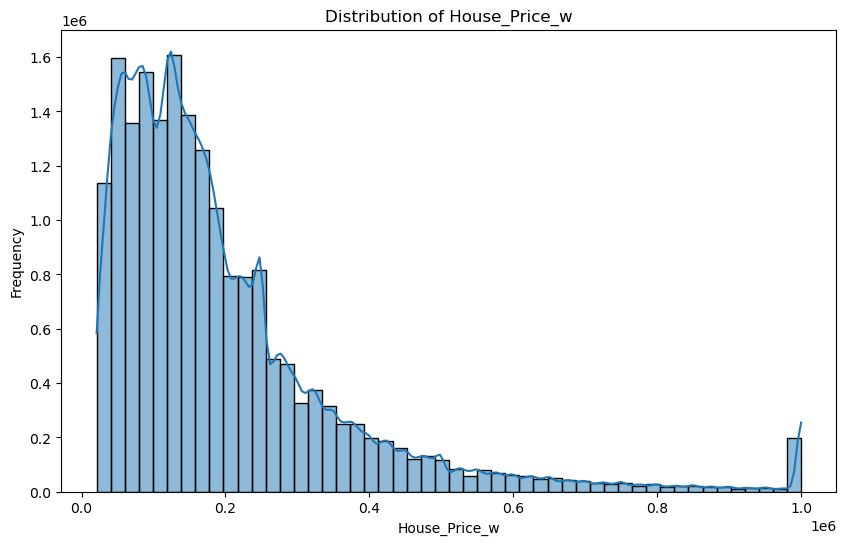

In [9]:
histogram_with_kde(house_df_final, 'House_Price_w')

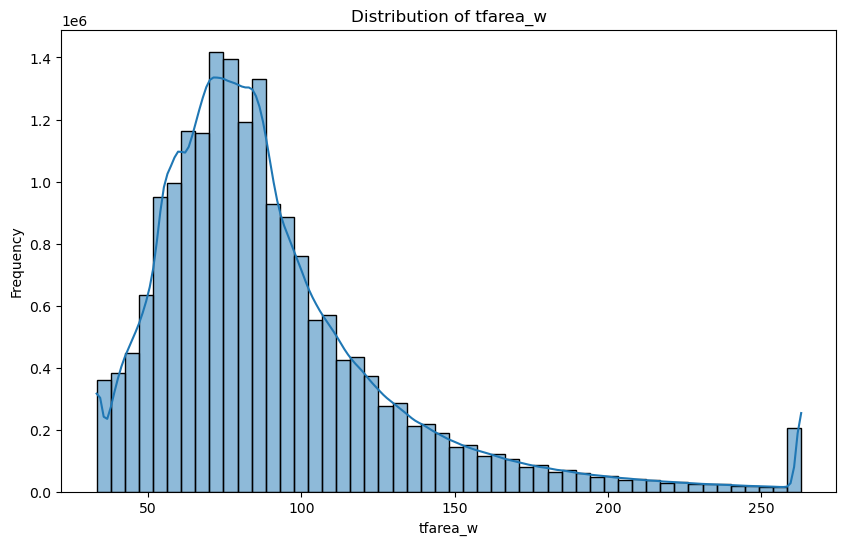

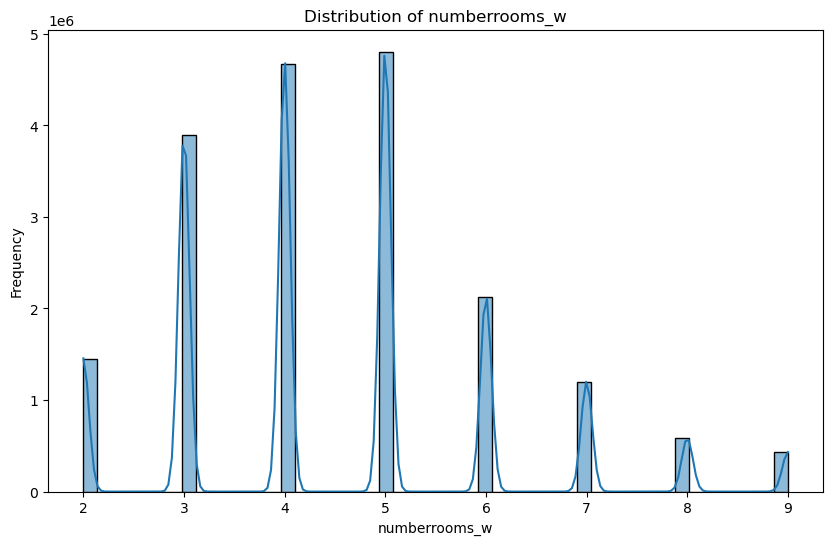

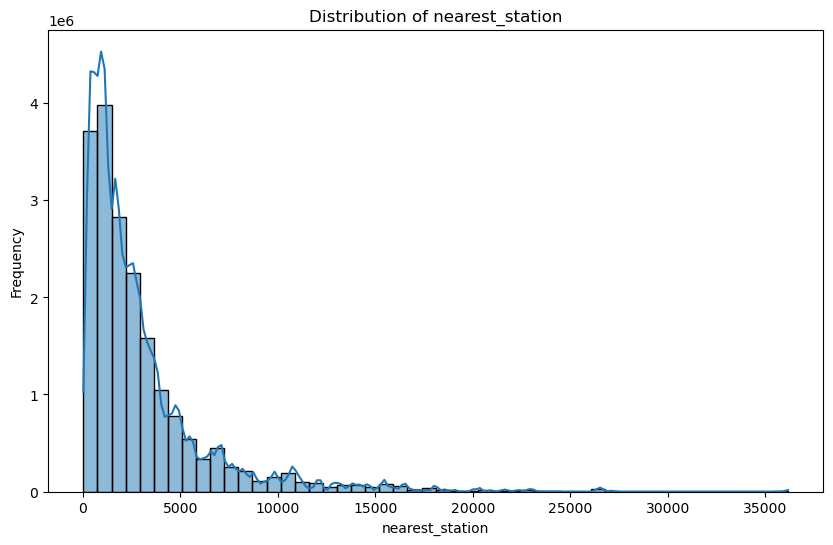

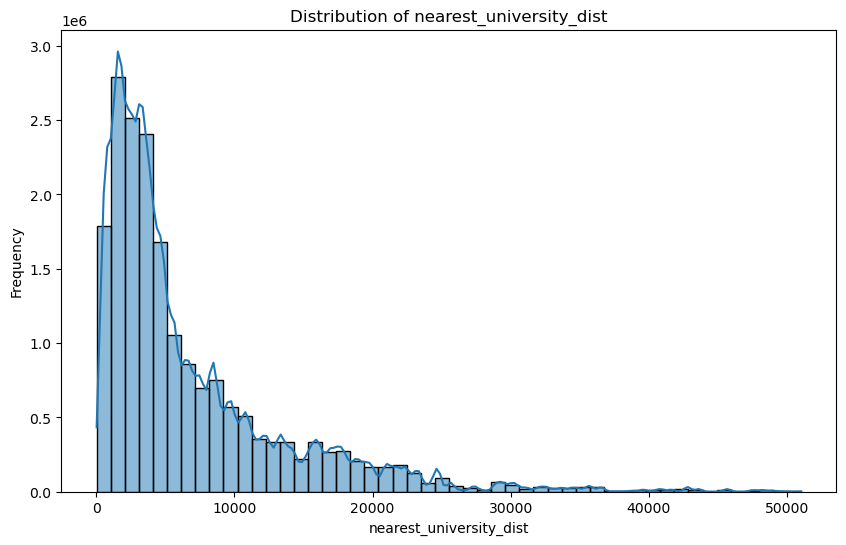

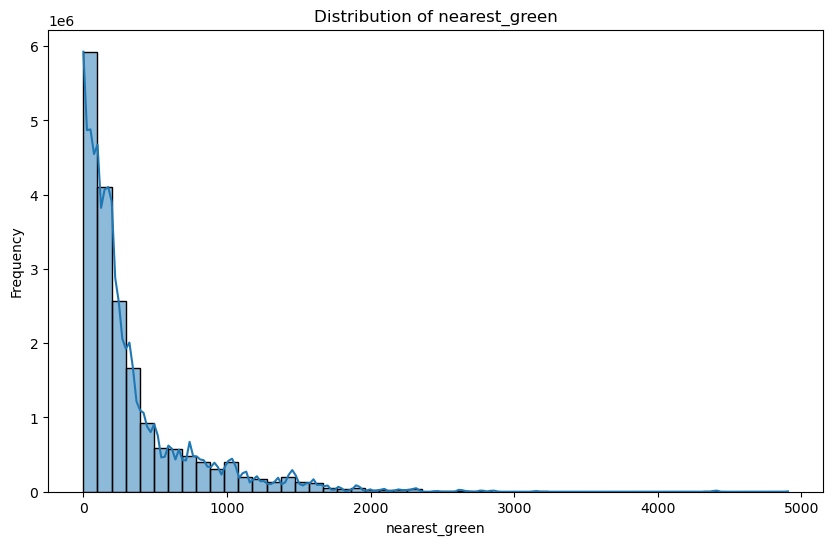

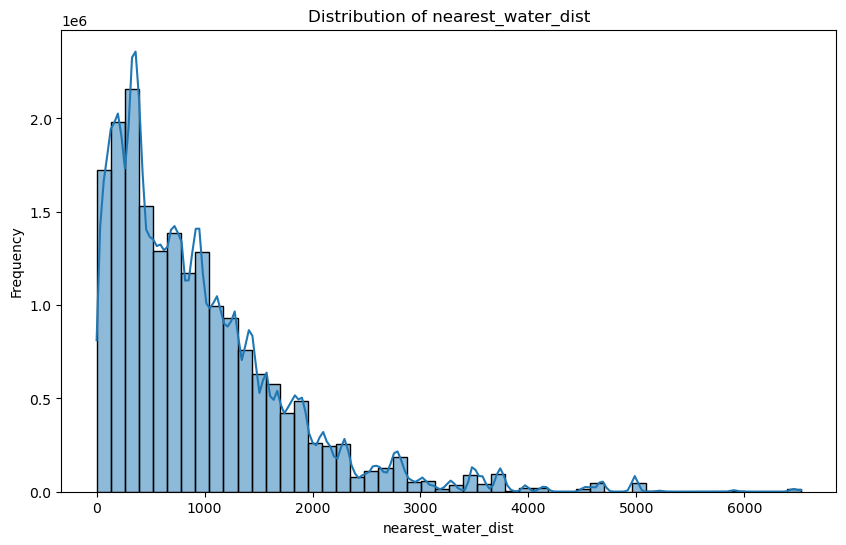

In [11]:
for col in cols_to_plot:
    histogram_with_kde(house_df_final, col)

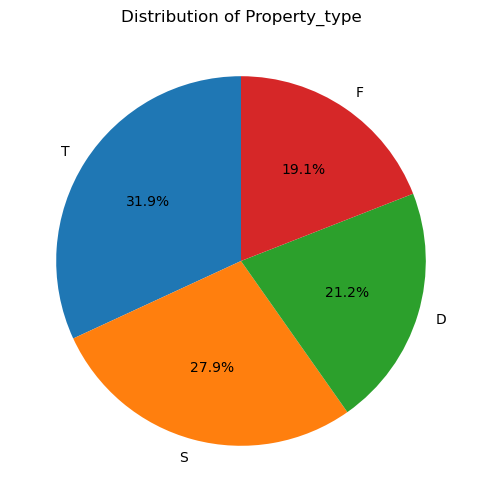

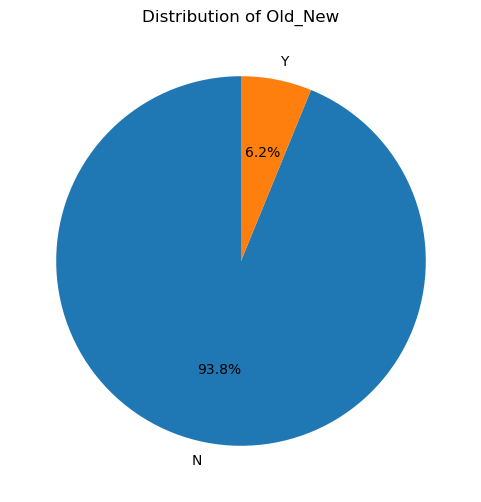

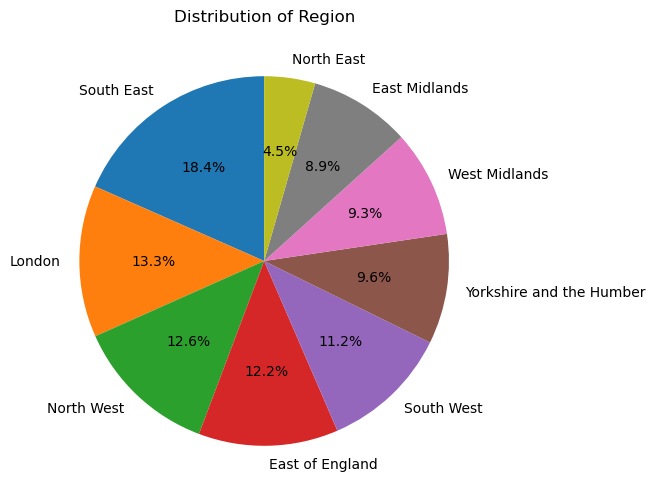

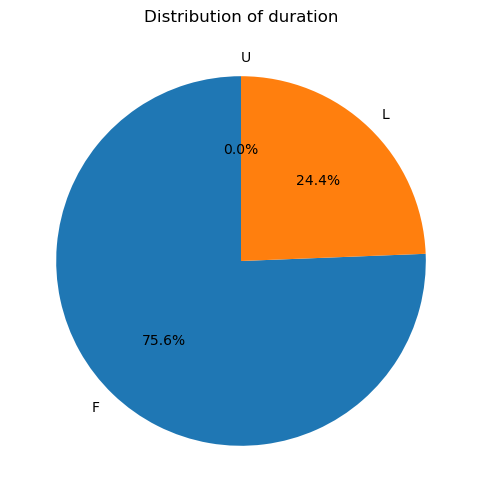

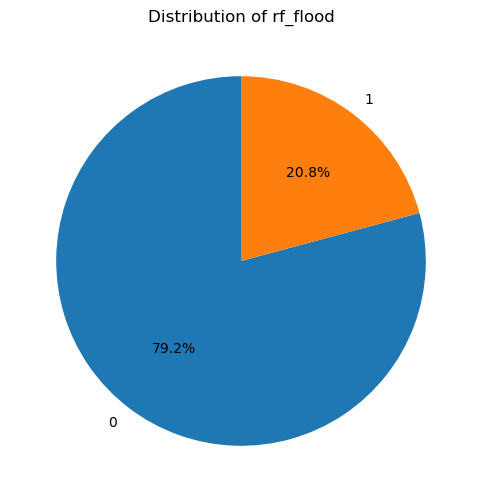

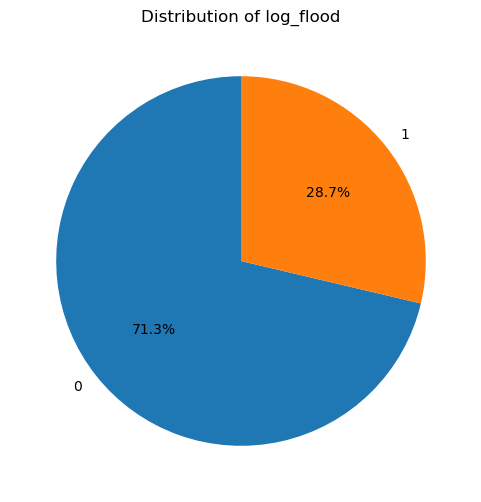

In [12]:
categorical_cols = ['Property_type', 'Old_New', 'Region', 'duration', 'rf_flood', 'log_flood']

for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    house_df_final[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.ylabel('')
    plt.show()

# Map

In [2]:
map_df = pd.read_csv("C:/Users/nph1u24/OneDrive - University of Southampton/MSc Bussiness Analytics and Finance/Project/Data/UK House price/RProject/RProject/map_with_predictions.csv")


In [20]:
map_df.columns.tolist()

['curvature',
 'flow',
 'hand',
 'flooded',
 'lulc',
 'rainfall',
 'elevation',
 'slope',
 'twi',
 'waterdist',
 'soilreclass',
 'problogit',
 'predlogit',
 'probrf',
 'predrf']

In [21]:
map_df

,curvature,flow,hand,flooded,lulc,rainfall,elevation,slope,twi,waterdist,soilreclass,problogit,predlogit,probrf,predrf
0,-8.000000e-06,1,1.200000,1,3,609.227539,1.464805,0.361808,8.525631,1036.763428,C,0.790657,1,0.978,1
1,-1.600000e-06,0,3.900002,1,4,840.262634,133.837494,12.175253,3.718908,163.855102,B,0.700170,1,0.764,1
2,1.540000e-05,0,0.200000,1,4,0.000000,5.690566,0.436868,6.900513,70.070374,C,0.974008,1,0.938,1
3,3.000000e-07,0,0.200000,1,4,768.052979,5.709197,0.436868,7.297970,141.718460,C,0.927702,1,0.976,1
4,1.700000e-06,0,0.200000,1,4,767.952698,5.767658,0.436868,6.015692,182.200623,C,0.905174,1,0.984,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3240679,5.096000e-04,0,20.199999,0,20,556.061951,29.258533,3.044779,4.515569,204.918610,C,0.033230,0,0.314,0
3240680,1.817000e-04,0,9.000000,0,21,554.259827,22.230190,5.437590,4.515569,128.410721,C,0.559205,1,0.542,1
3240681,-3.000000e-05,1,0.000000,0,18,552.457703,8.969912,7.000942,4.515569,52.396523,C,0.951832,1,0.812,1
3240682,4.570000e-05,0,2.200000,0,19,550.622925,2.714786,0.394488,7.399723,51.654633,C,0.905400,1,0.908,1


In [4]:
map_df.columns.tolist()

['Unnamed: 0.1',
 'Unnamed: 0',
 'East',
 'North',
 'Curvature',
 'Flow',
 'HAND',
 'Flooded',
 'LULC',
 'Rainfall',
 'Elevation',
 'Slope',
 'TWI',
 'WaterDist',
 'Soil_reclass',
 'prob_logit',
 'pred_logit',
 'prob_rf',
 'pred_rf']

In [5]:
map_df = map_df[['Curvature',
    'Flow',
    'HAND',
    'Flooded',
    'LULC',
    'Rainfall',
    'Elevation',
    'Slope',
    'TWI',
    'WaterDist',
    'Soil_reclass',
    'prob_logit',
    'pred_logit',
    'prob_rf',
    'pred_rf']]

In [6]:
map_df.describe()

,Curvature,Flow,HAND,Flooded,LULC,Rainfall,Elevation,Slope,TWI,WaterDist,prob_logit,pred_logit,prob_rf,pred_rf
count,3.240684e+06,3.240684e+06,3.240684e+06,3.240684e+06,3.240684e+06,3.240684e+06,3.240684e+06,3.240684e+06,3.240684e+06,3.240684e+06,3.240684e+06,3.240684e+06,3.240684e+06,3.240684e+06
mean,5.242662e-05,1.122600e+01,2.083854e+01,3.498737e-02,6.252256e+00,8.701480e+02,1.082019e+02,3.654445e+00,5.127488e+00,1.045189e+03,2.394631e-01,2.184236e-01,1.835958e-01,1.529683e-01
std,1.954627e-04,6.209649e+01,3.067451e+01,1.837478e-01,5.706828e+00,3.235455e+02,1.053620e+02,3.699564e+00,1.569711e+00,9.368635e+02,3.065836e-01,4.131765e-01,2.851118e-01,3.599570e-01
min,-3.158800e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-9.758293e+00,1.638840e-02,3.445103e-01,1.767767e+00,2.220446e-16,0.000000e+00,0.000000e+00,0.000000e+00
25%,-3.880000e-05,0.000000e+00,3.800000e+00,0.000000e+00,3.000000e+00,6.654559e+02,3.653193e+01,1.300513e+00,4.051625e+00,3.573388e+02,7.568966e-04,0.000000e+00,2.000000e-03,0.000000e+00
50%,7.000000e-07,1.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00,7.663081e+02,8.127976e+01,2.500148e+00,4.776856e+00,7.970894e+02,5.983376e-02,0.000000e+00,2.200000e-02,0.000000e+00
75%,7.910000e-05,3.000000e+00,2.510000e+01,0.000000e+00,4.000000e+00,9.552639e+02,1.406820e+02,4.723112e+00,5.850173e+00,1.445286e+03,4.507437e-01,0.000000e+00,2.540000e-01,0.000000e+00
max,5.781300e-03,5.522000e+03,7.001000e+02,1.000000e+00,2.100000e+01,4.799496e+03,9.573046e+02,5.455498e+01,1.959047e+01,8.175320e+03,9.999967e-01,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
col_continuous_map = ['Curvature',
    'Flow',
    'HAND',
    'Flooded',
    'Rainfall',
    'Elevation',
    'Slope',
    'TWI',
    'WaterDist',
    'prob_logit',
    'prob_rf']

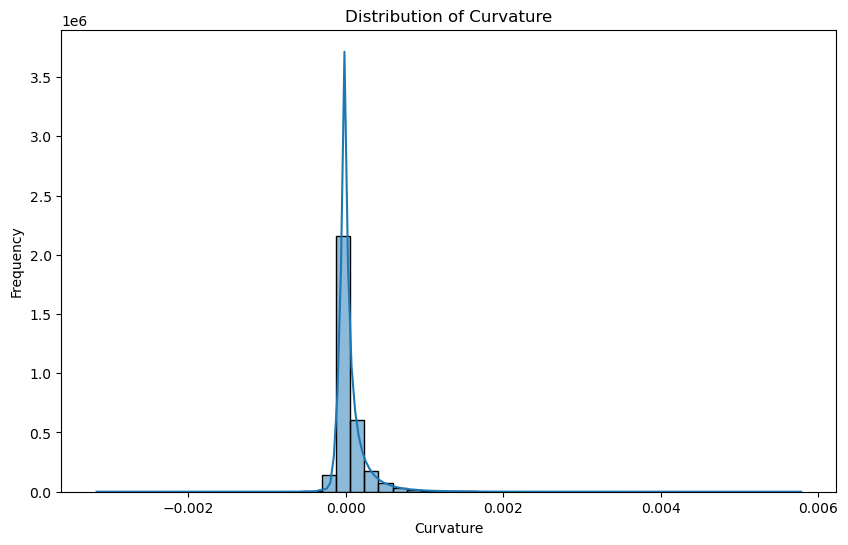

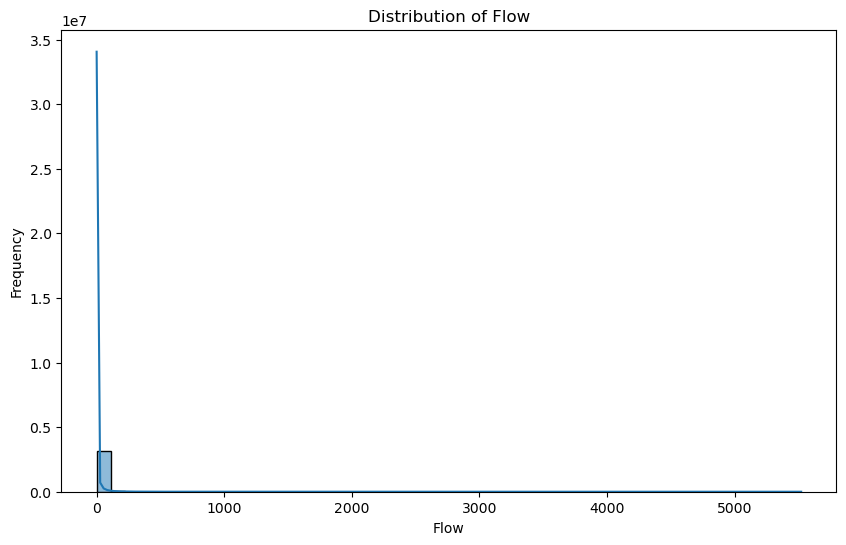

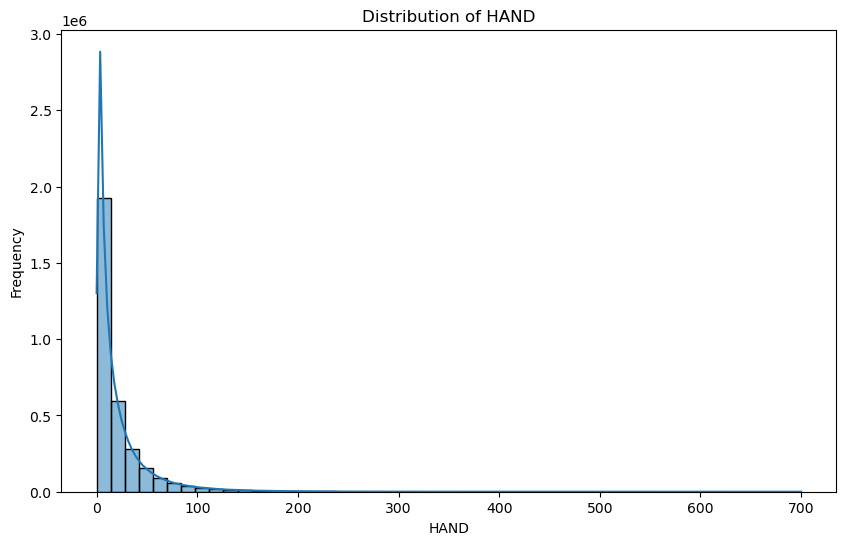

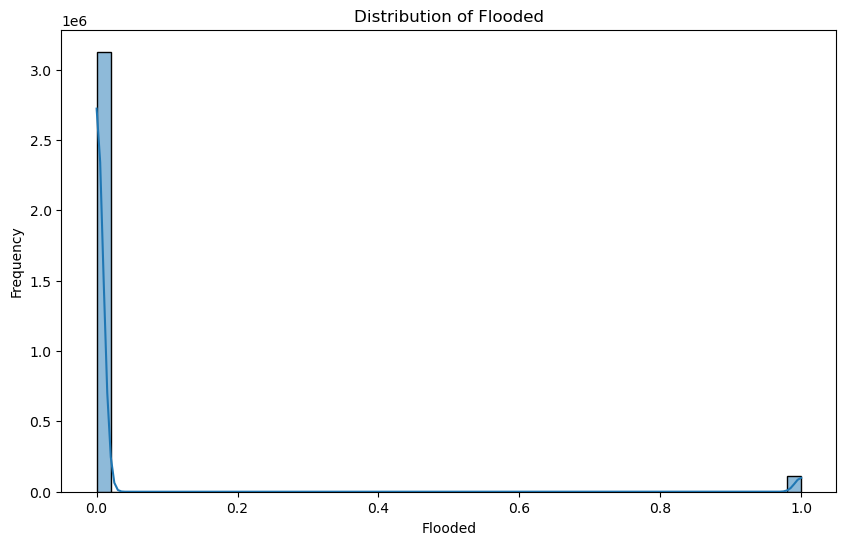

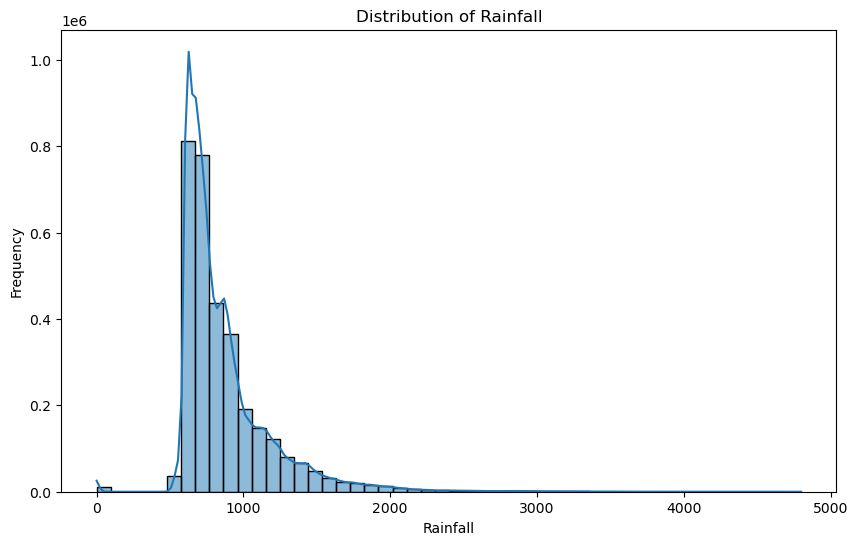

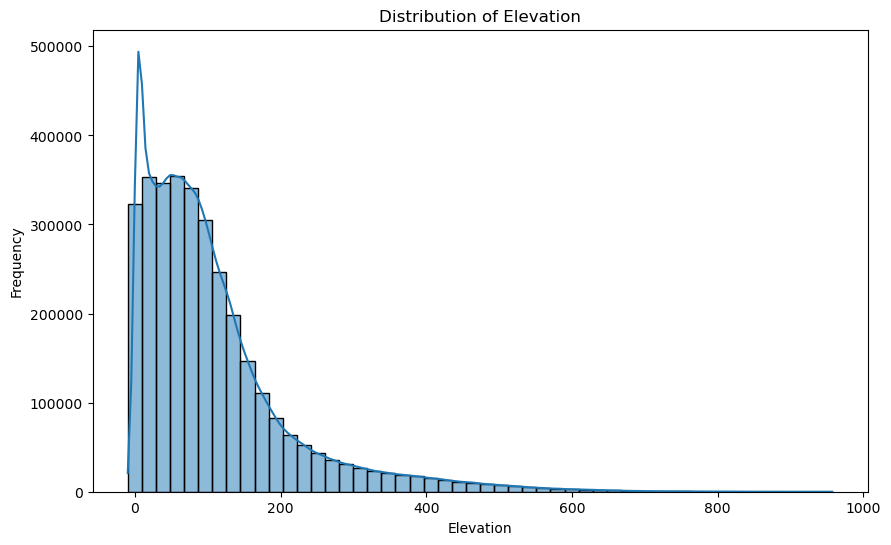

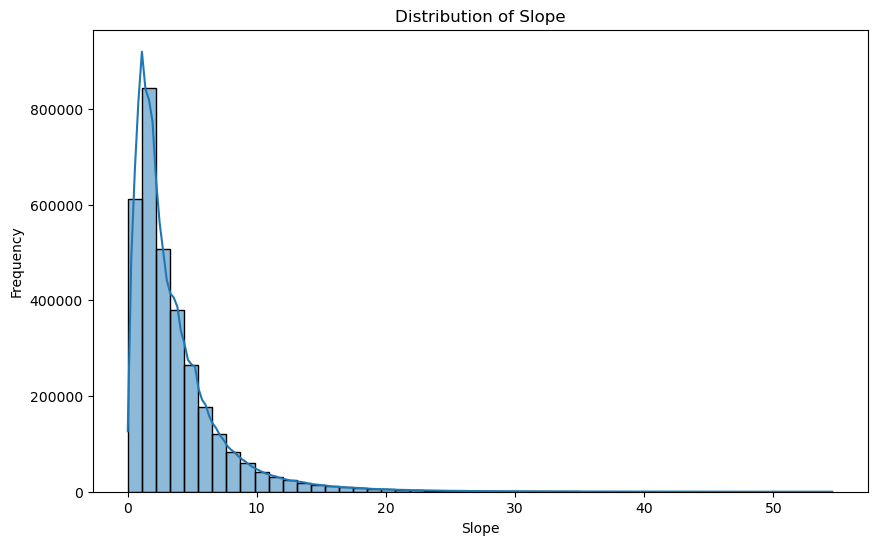

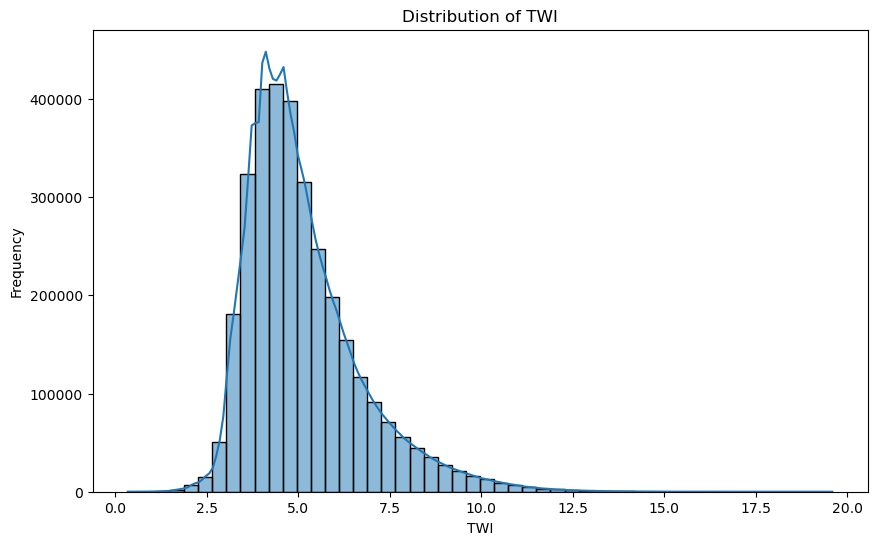

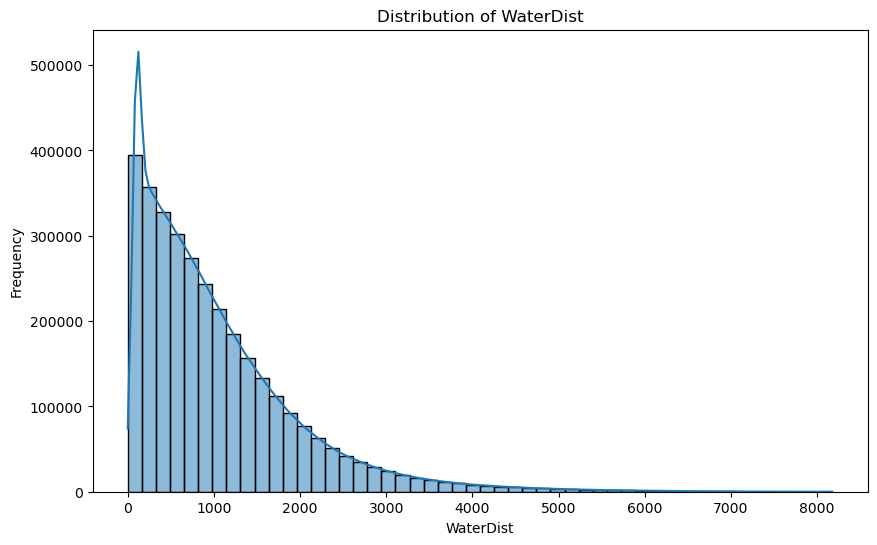

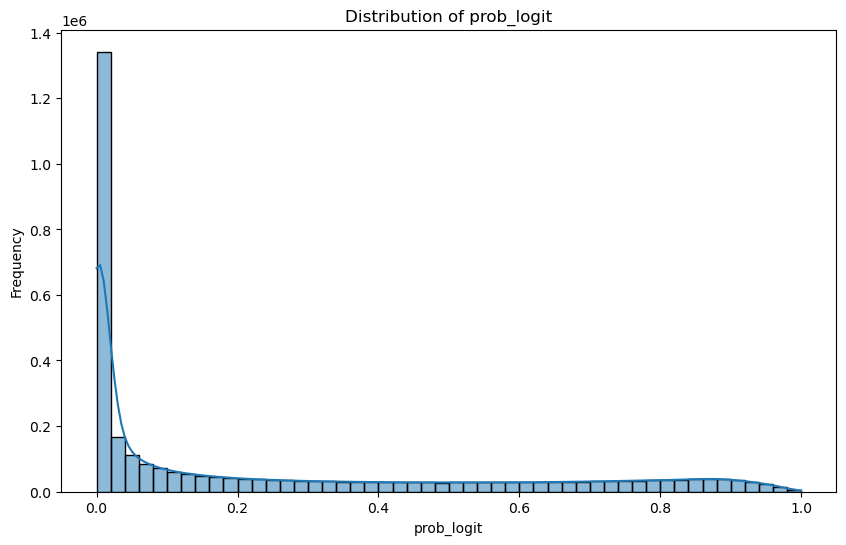

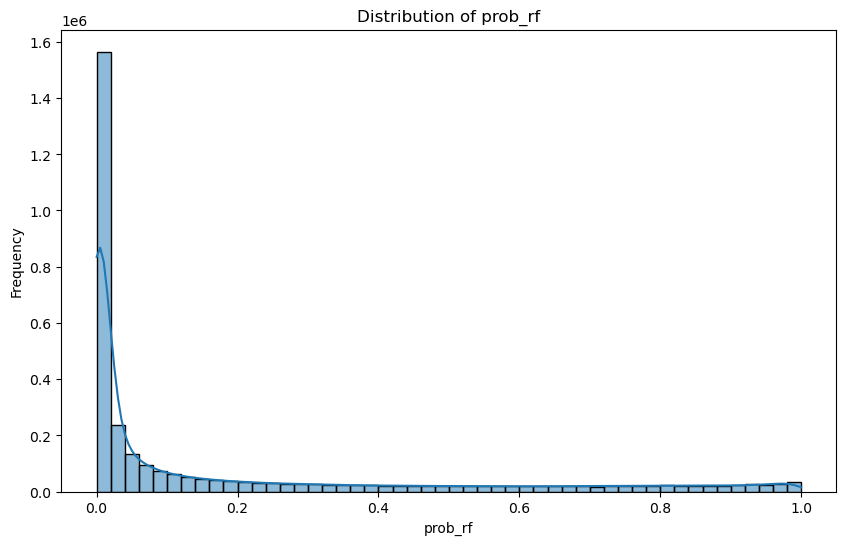

In [10]:
for col in col_continuous_map:
    histogram_with_kde(map_df, col)

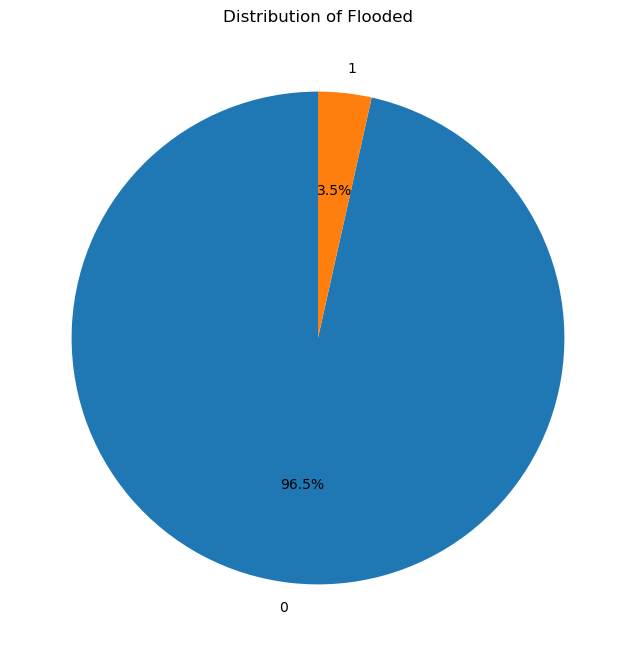

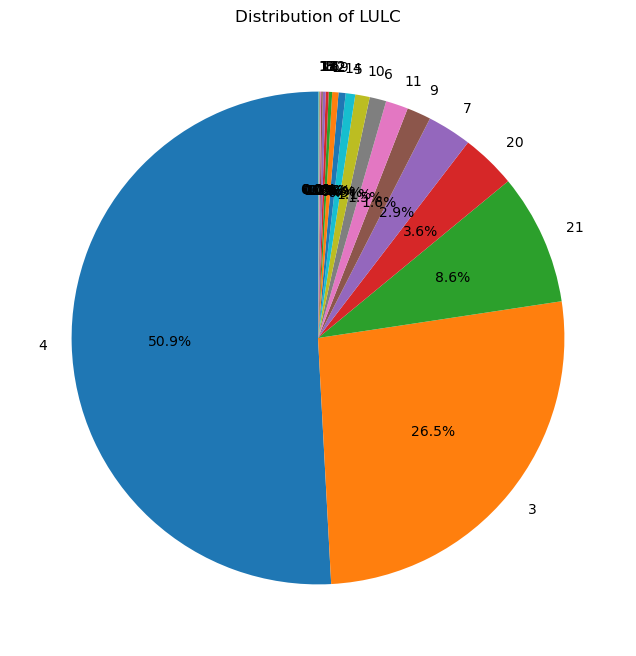

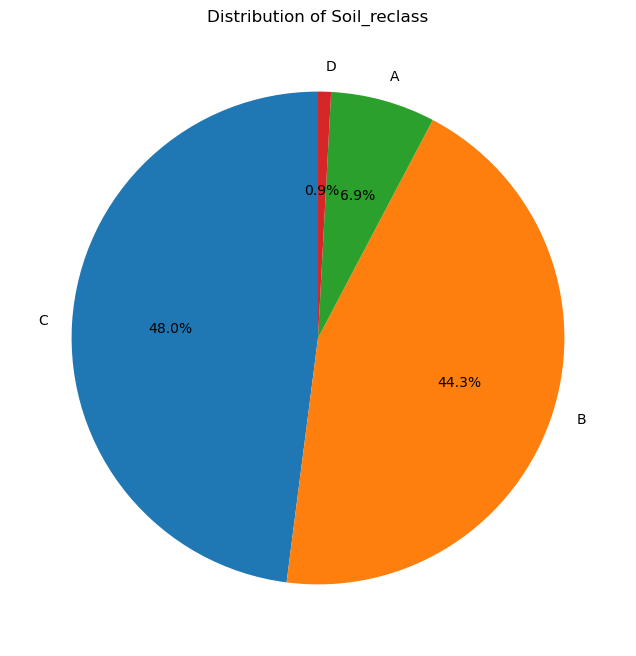

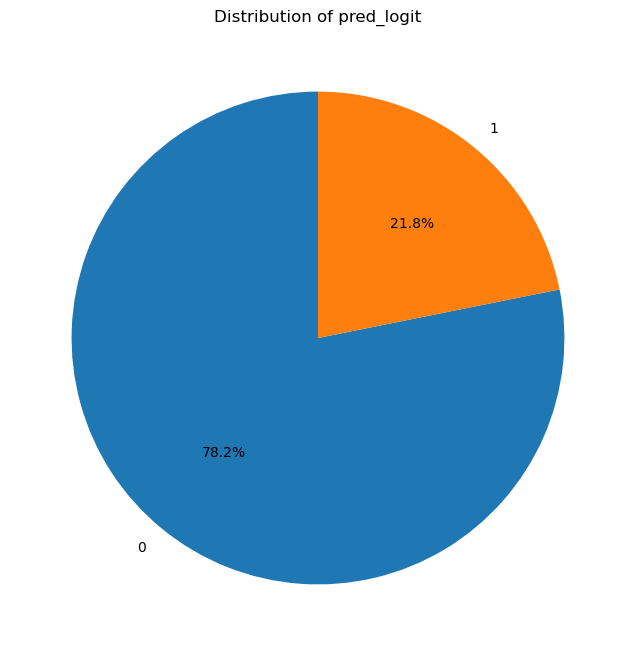

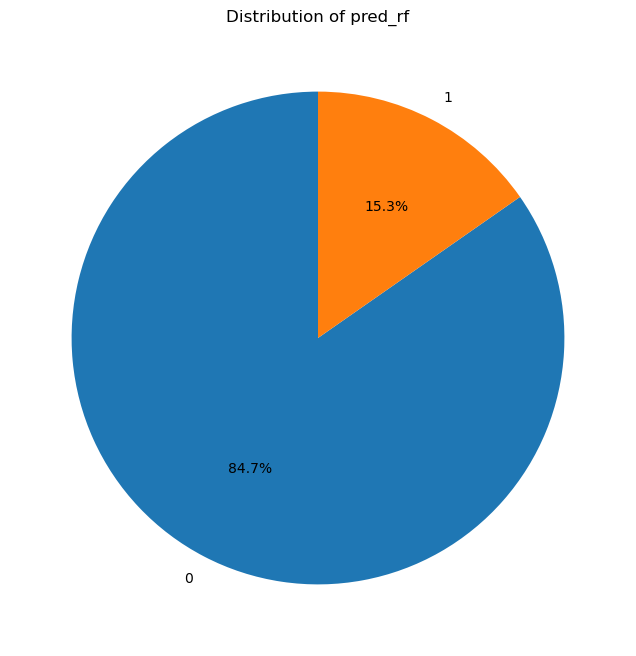

In [11]:
categorical_cols_map = [
    'Flooded',
    'LULC',
    'Soil_reclass',
    'pred_logit',
    'pred_rf']

for col in categorical_cols_map:
    plt.figure(figsize=(10, 8))
    map_df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.ylabel('')
    plt.show()

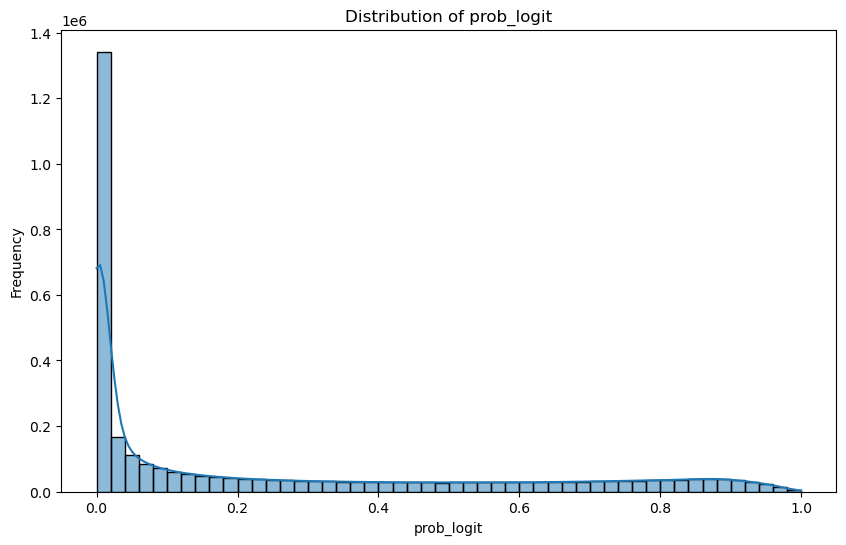

In [14]:
histogram_with_kde(map_df, 'prob_logit')

## Other Visualizations

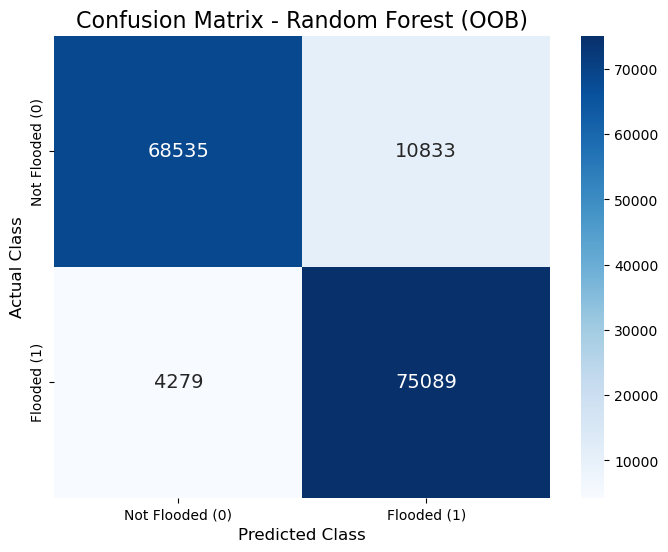

In [ ]:
# --- Data from your R output ---
# Confusion matrix values: [[TN, FP], [FN, TP]]
cm_data = np.array([
    [68535, 10833],  # Actual Class 0 (Not Flooded)
    [4279, 75089]   # Actual Class 1 (Flooded)
])

# --- Class Labels ---
class_labels = ["Not Flooded (0)", "Flooded (1)"]

# --- Create the plot ---
plt.figure(figsize=(8, 6)) # Set the figure size

# Create the heatmap using seaborn
sns.heatmap(cm_data, 
            annot=True,     # Show the numbers in each cell
            fmt='d',        # Format the numbers as integers
            cmap='Blues',   # Color map
            xticklabels=class_labels,
            yticklabels=class_labels,
            annot_kws={"size": 14}) # Increase font size of annotations

# --- Add labels and title for clarity ---
plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Actual Class', fontsize=12)

# --- Display the plot ---
plt.show()